In [1]:
# Script para obtener los tamaños de las regiones del dataset

In [2]:
import os 
import numpy as np
from util_loads import loadMask
from scipy.stats import skew,kurtosis
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.pyplot import figure
%matplotlib inline 
from scipy.ndimage import label, generate_binary_structure
import seaborn as sns

In [3]:
layer_dataset = './dataset/MICROCYSTS/'
file_list = [layer_dataset + x for x in os.listdir(layer_dataset) if not x.startswith('.') and 'jupyter' not in x.lower()]

In [4]:
def assignLabel(mask):
    results = []
    
    s = generate_binary_structure(2,2)
    label_structures, num_features = label(mask, s)

    for connected_component_id in [x+1 for x in range(num_features)]:
        current_component = label_structures == connected_component_id
        csize = np.nansum(current_component)
        #if csize > 5:
        results.append(csize)
    return results

In [6]:

total_col_len = []
for x in file_list:
    current_mask = loadMask(x)
    # Sumamos en vertical, dándonos la longitud de cada fila
    total_col_len += assignLabel(current_mask)
    
total_col_len = np.array(total_col_len)



1894.4346575566428


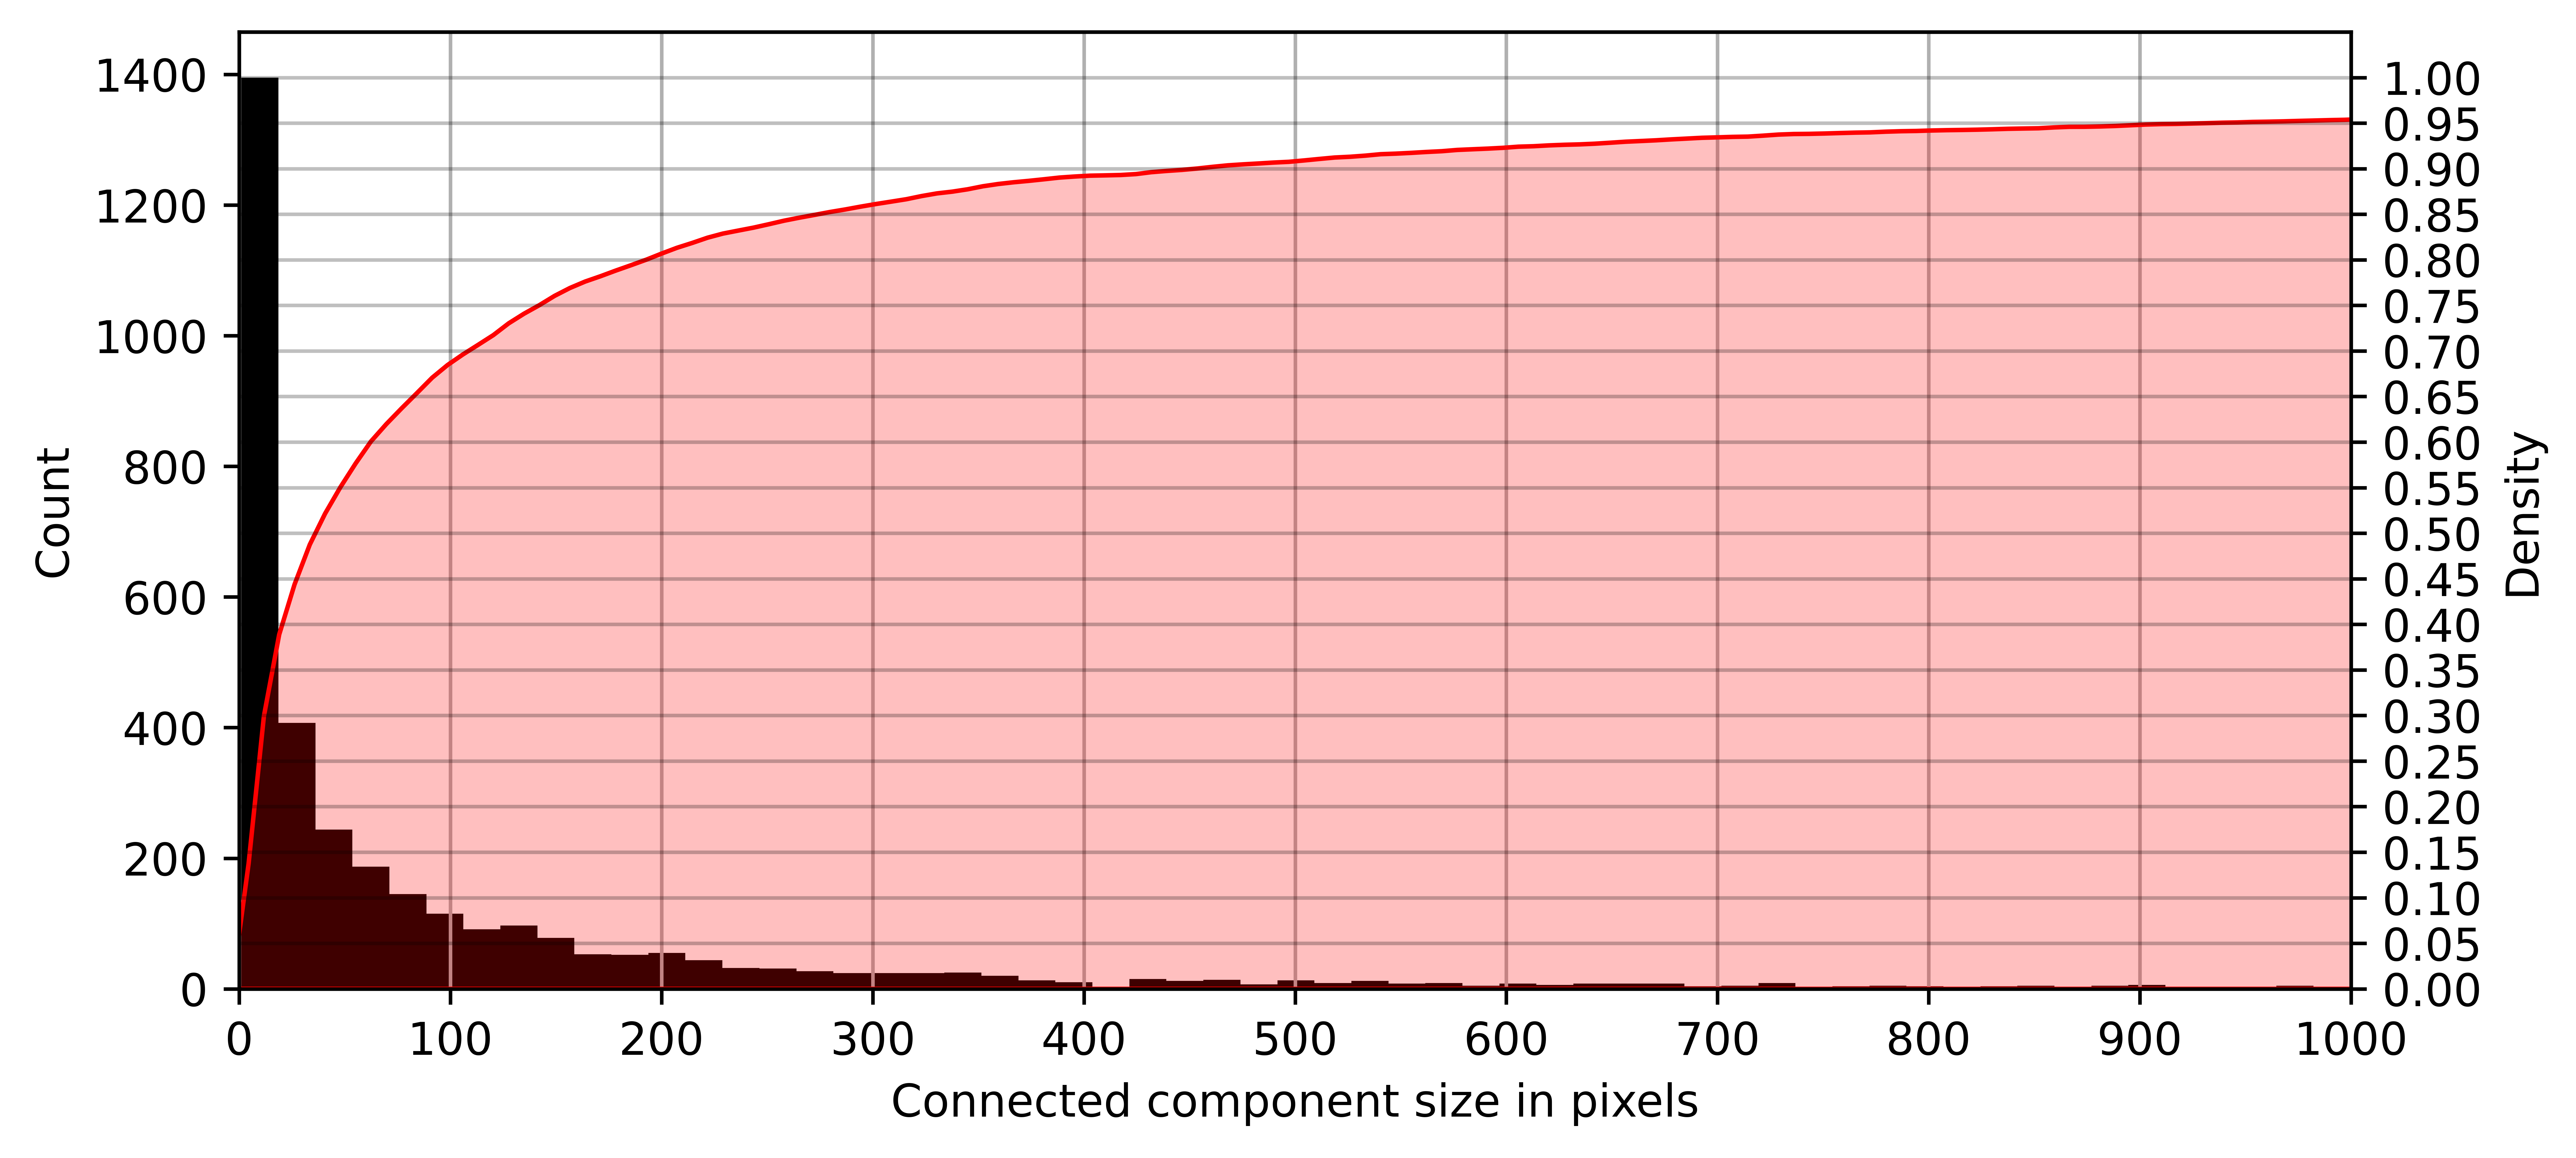

In [101]:
figure(figsize=(8, 3.5), dpi=1200)
print(np.std(total_col_len))
ax = plt.gca()
sns.histplot(total_col_len,ax=ax,color='k',alpha=1)
plt.grid(axis='x')
ax2 = ax.twinx()
sns.kdeplot(total_col_len,cumulative=True,fill = True,gridsize=10000,ax=ax2,bw_adjust=0.01,color='r')
plt.xlim(0,1000)
plt.tight_layout()
ax2.set_yticks(np.linspace(0.0,1,21))
ax.set_xticks(range(0,1001,100))
ax.set_xlabel('Connected component size in pixels')
plt.grid(which='both',alpha=0.25,axis='both',color='k')
plt.savefig('connectedplot.png', dpi=300, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=True, bbox_inches='tight', pad_inches=0, metadata=None)
